# SVM - Support Vector Machines: Fundamentos e prática

Tutorial made from 'SVM - Support Vector Machines: Fundamentos e prática' (Luís Fred) by Marcus Mariano

Link -> https://www.youtube.com/watch?v=b8nP9g0p8X4&t=298s


In [1]:
import pandas as pd
import re
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline

# To do operations in sequence
from sklearn.pipeline import Pipeline  
# To make text in a matrix
from sklearn.feature_extraction.text import CountVectorizer  
# Pick up the result of CountVectorizer and make frequency of appearing.
from sklearn.feature_extraction.text import TfidfTransformer  
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

# Algorithms used
from sklearn.svm import LinearSVC, SVC

In [9]:
# Perform data cleansing
def clean_str(string):
    string = re.sub(r"\n", "", string)
    string = re.sub(r"\r", "", string)
    string = re.sub(r"[0-9]", "digit", string)
    string = re.sub(r"\'", "", string)
    string = re.sub(r"\"", "", string)
    
    return string.strip().lower()

In [4]:
# Read dataset
df = pd.read_csv("data/topics.csv")

In [5]:
df.head()

,Unnamed: 0,question_text,question_topic
0,0,"Hi! If I sign up for your email list, can I se...",Sales/Promotions
1,1,I'm going to be out of the country for about a...,Shipping
2,2,I was wondering if you'd be able to overnight ...,Shipping
3,3,The Swingline electronic stapler (472555) look...,Shipping
4,4,I think this cosmetic bag would work great for...,Shipping


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 3 columns):
Unnamed: 0        5000 non-null int64
question_text     5000 non-null object
question_topic    5000 non-null object
dtypes: int64(1), object(2)
memory usage: 117.3+ KB


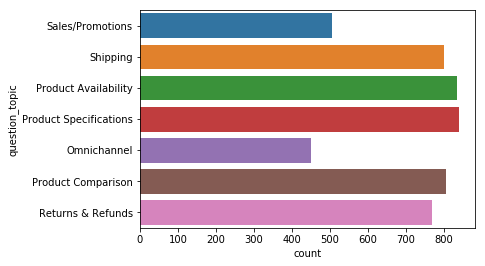

In [6]:
# To see the distributions of datas
sns.countplot(y="question_topic", data=df)

In [10]:

X = []
for i in range(df.shape[0]):
    X.append(clean_str(df.iloc[i][1]))

y = np.array(df['question_topic'])

In [11]:
X

['hi! if i sign up for your email list, can i select to get emails exclusively for sale products? im really only interested in shopping clearance deals.',
 'im going to be out of the country for about a week, but before i travel im going to be getting the animal print jumper, product code tdigitdigitdigitdigitdigitdigitj. can i have this held at the post office or a distribution centre for pickup? id just hate to have it sitting at my house when im not going to be around.',
 'i was wondering if youd be able to overnight a jacket (item #digitdigitdigitdigitdigitdigitdigit) to me in trenton, nj?',
 'the swingline electronic stapler (digitdigitdigitdigitdigitdigit) looks really great, but i would need to have it shipped to st. thomas in the us virgin islands. do you allow for that, or is that considered international shipping?',
 'i think this cosmetic bag would work great for me! however, do you know how long it would take to send that to me in kings mountain, nc (zip: digitdigitdigitdig

In [12]:
y

array(['Sales/Promotions', 'Shipping', 'Shipping', ...,
       'Product Comparison', 'Product Comparison', 'Product Comparison'],
      dtype=object)

In [13]:
# Divides the data into training and test sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

## With SVC Kernal RBF (Radial Basis Function)

In [14]:
# To do operations in sequence
model = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', SVC(kernel="rbf", gamma=0.9, C=4.0))
])

In [16]:
# Set this SVC model to training data.
model.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('vectorizer', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
       ...,
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

In [17]:
# Use the prediction method to predict values using your SVC and X_test model.
pred = model.predict(X_test)

In [19]:
# Confusin Matrix
print(confusion_matrix(y_test,pred))

[[123   0   0   0   0   0   1]
 [  0 256   1   6   0   0   0]
 [  0   0 235  10   0   0   0]
 [  0   2   6 235   0   0   0]
 [  0   0   0   1 214   1   0]
 [  0   5   0   3   0 141   0]
 [  0   0   0   0   0   0 260]]


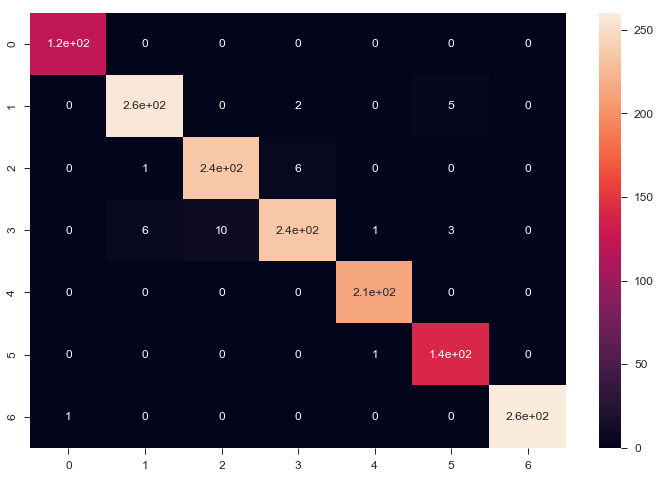

In [18]:
# Set up heatmap
c_matrix = confusion_matrix(pred, y_test)

sns.set(style="ticks", color_codes=True, rc={"figure.figsize": (12, 8)}, font_scale=1.2)
sns.heatmap(c_matrix, annot=True, annot_kws={"size": 12})

In [20]:
# Accuracy of the model
accuracy_score(y_test, pred)

0.976

## With SVC Linear 

In [22]:
# To do operations in sequence
model2 = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('tfidf', TfidfTransformer()),    
    ('clf', LinearSVC(C=2.0))
])

In [23]:
# Set this SVC model to training data.
model2.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('vectorizer', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
       ...ax_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0))])

In [24]:
# Use the prediction method to predict values using your SVC and X_test model.
pred2 = model2.predict(X_test)

In [25]:
# Confusin Matrix
print(confusion_matrix(y_test,pred2))

[[123   0   0   0   0   0   1]
 [  0 258   1   4   0   0   0]
 [  0   1 237   7   0   0   0]
 [  0   3   5 235   0   0   0]
 [  0   0   0   1 214   1   0]
 [  0   4   0   1   0 144   0]
 [  0   0   0   0   0   0 260]]


In [27]:
# Accuracy of the model
accuracy_score(y_test, pred2)

0.9806666666666667

## Asking questions to the model

In [28]:
# First questions
question = "Give me an discount"
model.predict([question])[0]

'Sales/Promotions'

In [30]:
# Second questions
question = "Do you have this shirt in red?"
model.predict([question])[0]

'Product Availability'

## Export model with Scikit-Learn

In [31]:
from sklearn.externals import joblib
joblib.dump(model, "model.pkl")

['model.pkl']

In [32]:
model_imported = joblib.load("model.pkl")

In [35]:
question = "Do you have this shirt in Blue?"
model_imported.predict([question])[0]

'Product Availability'